In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import statistics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm
## Feature selection using Boruta
from BorutaShap import BorutaShap
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

In [6]:
data = pd.read_csv('sp_emx1_all_features_withlabels.csv')
data.head()
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99059 entries, 0 to 99058
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   States                         99059 non-null  int64  
 1   Label                          99059 non-null  object 
 2   System                         99059 non-null  object 
 3   sys-labels                     99059 non-null  int64  
 4   sp_all_bp20_shear              61013 non-null  float64
 5   sp_all_bp20_stretch            61013 non-null  float64
 6   sp_all_bp20_stagger            61013 non-null  float64
 7   sp_all_bp20_buckle             61013 non-null  float64
 8   sp_all_bp20_propeller          61013 non-null  float64
 9   sp_all_bp20_opening            61013 non-null  float64
 10  sp_all_bp19_shear              78806 non-null  float64
 11  sp_all_bp19_stretch            78806 non-null  float64
 12  sp_all_bp19_stagger            78806 non-null 

In [7]:
data.columns
prot=data[['States', 'Label', 'System', 'sys-labels','Angle', 'RMSD', 'SASA',
       'ROG', 'sgRNA-tDNA cont', 'LIE', 'Sp-ntDNA-tDNA_native',
       'Sp-ntDNA-tDNA-RuvC_non-native', 'Sp-hy-HNH_native',
       'Sp-hy-HNH_non-native', 'Sp-hy-REC1_native', 'Sp-hy-REC1_non-native',
       'Sp-hy-REC2_native', 'Sp-hy-REC2_non-native', 'Sp-hy-REC3_native',
       'Sp-hy-REC3_non-native', 'Sp-hy-RuvC_native', 'Sp-hy-RuvC_non-native']]
prot.to_csv('sp_emx1_only_protein_withlabels_filtered.csv')
prot.head()

,States,Label,System,sys-labels,Angle,RMSD,SASA,ROG,sgRNA-tDNA cont,LIE,...,Sp-hy-HNH_native,Sp-hy-HNH_non-native,Sp-hy-REC1_native,Sp-hy-REC1_non-native,Sp-hy-REC2_native,Sp-hy-REC2_non-native,Sp-hy-REC3_native,Sp-hy-REC3_non-native,Sp-hy-RuvC_native,Sp-hy-RuvC_non-native
0,0,Sp_native-1,Sp_native,0,103.3011,0.0000,14157.2066,38.5234,929.0,-264.0086,...,66,0,688,0,45,0,473,0,729,0
1,0,Sp_native-2,Sp_native,0,100.9966,3.9789,13732.5256,37.7180,438.0,-227.1491,...,50,40,522,142,30,5,366,167,500,269
2,0,Sp_native-3,Sp_native,0,101.1213,3.7594,14321.8791,38.0602,485.0,-158.1960,...,60,35,503,118,34,0,329,160,483,235
3,0,Sp_native-4,Sp_native,0,96.4444,4.0142,13995.0482,37.8444,469.0,-241.4879,...,53,36,466,105,35,15,356,165,536,279
4,0,Sp_native-5,Sp_native,0,98.1099,3.7774,14417.0563,38.0603,474.0,-166.2298,...,50,49,448,115,34,20,333,161,496,271


In [8]:
data['States'].unique()

array([0, 3, 2, 4, 1])

In [9]:
data['States'].value_counts()

4    59618
3    17186
1    11844
0    10406
2        5
Name: States, dtype: int64

In [11]:
data=data.drop(['Label','System','sys-labels'], axis=1)
data.head()

,States,sp_all_bp20_shear,sp_all_bp20_stretch,sp_all_bp20_stagger,sp_all_bp20_buckle,sp_all_bp20_propeller,sp_all_bp20_opening,sp_all_bp19_shear,sp_all_bp19_stretch,sp_all_bp19_stagger,...,Sp-hy-HNH_native,Sp-hy-HNH_non-native,Sp-hy-REC1_native,Sp-hy-REC1_non-native,Sp-hy-REC2_native,Sp-hy-REC2_non-native,Sp-hy-REC3_native,Sp-hy-REC3_non-native,Sp-hy-RuvC_native,Sp-hy-RuvC_non-native
0,0,-2.0421,-0.1780,-1.0560,-31.9772,-1.7352,-4.9460,-0.6412,-1.8257,-0.5815,...,66,0,688,0,45,0,473,0,729,0
1,0,-1.9958,-0.4045,-0.7358,-17.7083,0.1685,-1.8600,-0.0620,-2.4507,-0.7269,...,50,40,522,142,30,5,366,167,500,269
2,0,-2.0316,-0.4997,-0.2185,-25.4601,7.6702,-3.4554,-0.1609,2.7666,-0.2383,...,60,35,503,118,34,0,329,160,483,235
3,0,-2.3158,-0.4664,-0.8223,-24.1637,-4.7962,-6.8853,-0.7806,-2.0720,-0.2715,...,53,36,466,105,35,15,356,165,536,279
4,0,-2.4491,-0.4488,-0.7102,-24.5353,0.4794,-6.3136,-0.5629,-1.9565,0.0480,...,50,49,448,115,34,20,333,161,496,271


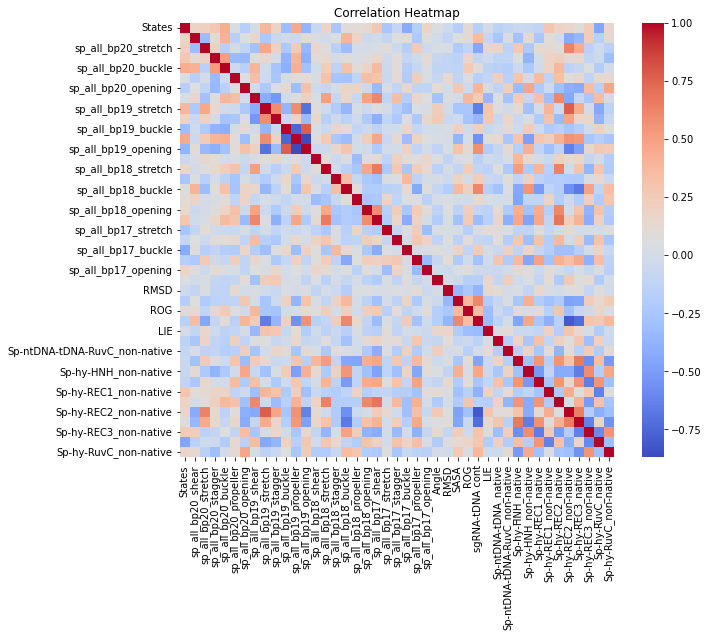

In [12]:


# Assuming the dataframe is stored in a variable called 'df'
# You may need to adjust the code if your dataframe has different column names

# Remove unnecessary columns
# df_heatmap = df.iloc[:, 5:]

# Create a correlation matrix
correlation_matrix = data.corr()

# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()


In [13]:
data.head()

,States,sp_all_bp20_shear,sp_all_bp20_stretch,sp_all_bp20_stagger,sp_all_bp20_buckle,sp_all_bp20_propeller,sp_all_bp20_opening,sp_all_bp19_shear,sp_all_bp19_stretch,sp_all_bp19_stagger,...,Sp-hy-HNH_native,Sp-hy-HNH_non-native,Sp-hy-REC1_native,Sp-hy-REC1_non-native,Sp-hy-REC2_native,Sp-hy-REC2_non-native,Sp-hy-REC3_native,Sp-hy-REC3_non-native,Sp-hy-RuvC_native,Sp-hy-RuvC_non-native
0,0,-2.0421,-0.1780,-1.0560,-31.9772,-1.7352,-4.9460,-0.6412,-1.8257,-0.5815,...,66,0,688,0,45,0,473,0,729,0
1,0,-1.9958,-0.4045,-0.7358,-17.7083,0.1685,-1.8600,-0.0620,-2.4507,-0.7269,...,50,40,522,142,30,5,366,167,500,269
2,0,-2.0316,-0.4997,-0.2185,-25.4601,7.6702,-3.4554,-0.1609,2.7666,-0.2383,...,60,35,503,118,34,0,329,160,483,235
3,0,-2.3158,-0.4664,-0.8223,-24.1637,-4.7962,-6.8853,-0.7806,-2.0720,-0.2715,...,53,36,466,105,35,15,356,165,536,279
4,0,-2.4491,-0.4488,-0.7102,-24.5353,0.4794,-6.3136,-0.5629,-1.9565,0.0480,...,50,49,448,115,34,20,333,161,496,271


In [14]:
data.iloc[:, 1:]

,sp_all_bp20_shear,sp_all_bp20_stretch,sp_all_bp20_stagger,sp_all_bp20_buckle,sp_all_bp20_propeller,sp_all_bp20_opening,sp_all_bp19_shear,sp_all_bp19_stretch,sp_all_bp19_stagger,sp_all_bp19_buckle,...,Sp-hy-HNH_native,Sp-hy-HNH_non-native,Sp-hy-REC1_native,Sp-hy-REC1_non-native,Sp-hy-REC2_native,Sp-hy-REC2_non-native,Sp-hy-REC3_native,Sp-hy-REC3_non-native,Sp-hy-RuvC_native,Sp-hy-RuvC_non-native
0,-2.0421,-0.1780,-1.0560,-31.9772,-1.7352,-4.9460,-0.6412,-1.8257,-0.5815,148.5415,...,66,0,688,0,45,0,473,0,729,0
1,-1.9958,-0.4045,-0.7358,-17.7083,0.1685,-1.8600,-0.0620,-2.4507,-0.7269,161.0019,...,50,40,522,142,30,5,366,167,500,269
2,-2.0316,-0.4997,-0.2185,-25.4601,7.6702,-3.4554,-0.1609,2.7666,-0.2383,-162.3020,...,60,35,503,118,34,0,329,160,483,235
3,-2.3158,-0.4664,-0.8223,-24.1637,-4.7962,-6.8853,-0.7806,-2.0720,-0.2715,152.9802,...,53,36,466,105,35,15,356,165,536,279
4,-2.4491,-0.4488,-0.7102,-24.5353,0.4794,-6.3136,-0.5629,-1.9565,0.0480,159.7348,...,50,49,448,115,34,20,333,161,496,271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99054,-2.4800,0.2400,-0.7600,10.6900,23.7800,-33.3600,3.8400,-0.6200,-1.4600,3.4800,...,23,70,471,341,63,46,198,450,235,425
99055,-1.6200,0.4300,-0.3400,10.7000,33.5600,-41.9700,3.5500,-0.5800,-1.7600,13.2100,...,26,62,563,307,68,29,207,473,212,409
99056,-1.9300,0.3900,0.1300,16.9200,44.7800,-30.7000,3.2100,-0.2400,-0.9900,22.5900,...,25,62,509,277,72,48,201,469,243,432
99057,-1.7600,0.3100,0.0300,-7.2400,44.6800,-35.2900,4.2200,0.6400,-1.7600,21.6200,...,32,60,470,262,72,36,213,437,267,452


In [15]:
data.iloc[:, 1:].shape

(99059, 42)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99059 entries, 0 to 99058
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   States                         99059 non-null  int64  
 1   sp_all_bp20_shear              61013 non-null  float64
 2   sp_all_bp20_stretch            61013 non-null  float64
 3   sp_all_bp20_stagger            61013 non-null  float64
 4   sp_all_bp20_buckle             61013 non-null  float64
 5   sp_all_bp20_propeller          61013 non-null  float64
 6   sp_all_bp20_opening            61013 non-null  float64
 7   sp_all_bp19_shear              78806 non-null  float64
 8   sp_all_bp19_stretch            78806 non-null  float64
 9   sp_all_bp19_stagger            78806 non-null  float64
 10  sp_all_bp19_buckle             78806 non-null  float64
 11  sp_all_bp19_propeller          78806 non-null  float64
 12  sp_all_bp19_opening            78806 non-null 

In [17]:
# Step 1: Prepare the data
# dropping the rows having NaN values
data = data.dropna()
 
# To reset the indices
data = data.reset_index(drop=True)
X = data.iloc[:, 1:]  
y = data['States']    # Assuming 'states' is the target variable column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
y.value_counts()

4    29056
3    17186
0    10397
1      430
2        5
Name: States, dtype: int64

In [15]:
import pickle
with open('Feature_Selector_data_spcas9','rb') as f: 
    boruta_sp_all= pickle.load(f)
with open('Feature_Selector_dna_spcas9','rb') as f: 
    boruta_sp_dna= pickle.load(f)
with open('Feature_Selector_prot_spcas9_filtered','rb') as f: 
    boruta_sp_prot= pickle.load(f)

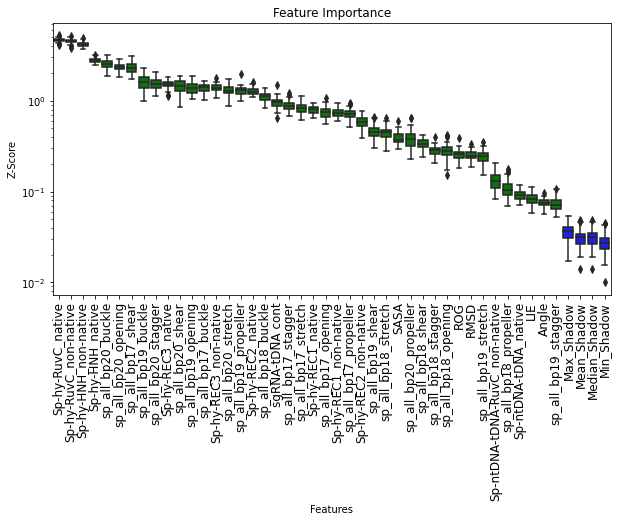

In [16]:
# Returns Boxplot of features
boruta_sp_all.plot(X_size=12, figsize=(10,5),
            y_scale='log', which_features='all')

In [17]:
# Display features to be removed
all_features_to_remove = boruta_sp_all.features_to_remove
print(all_features_to_remove)
# Removes them
X_train_sp_all_shap = X_train.drop(columns = all_features_to_remove)
X_test_sp_all_shap = X_test.drop(columns = all_features_to_remove)

[]


In [18]:
X_train['sp_all_bp20_shear']

12376   -2.6497
13378   -2.7232
51994    7.5700
20730   -1.3308
7094    -1.9022
          ...  
54343   -2.9000
38158    0.0000
860     -2.2241
15795   -2.5066
56422   -2.5400
Name: sp_all_bp20_shear, Length: 45659, dtype: float64

In [19]:
subset_sp_all = boruta_sp_all.Subset()
subset_sp_all['sp_all_bp20_shear']

12376   -2.6497
13378   -2.7232
51994    7.5700
20730   -1.3308
7094    -1.9022
          ...  
54343   -2.9000
38158    0.0000
860     -2.2241
15795   -2.5066
56422   -2.5400
Name: sp_all_bp20_shear, Length: 45659, dtype: float64

In [35]:
# Scale the top features data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_sp_all_shap)
X_test_scaled = scaler.transform(X_test_sp_all_shap)

# Initialize the models
rf_model = RandomForestClassifier()
gb_model = GradientBoostingClassifier()
ab_model = AdaBoostClassifier()
svm_model = SVC()
xgb_model = XGBClassifier()

# Define the parameter grids for each model
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

gb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 10]
}

ab_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.05, 0.01]
}

svm_params = {
    'C': [1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

xgb_params = {
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 10],
    'n_estimators': [100, 200, 300]
}

# Create a list of models and parameter grids
models = [rf_model, gb_model, ab_model, svm_model, xgb_model]
param_grids = [rf_params, gb_params, ab_params, svm_params, xgb_params]

# Create an empty dictionary to store best parameters
best_params_dict_sp_all = {}

# Perform grid search with tqdm progress bar
for model, param_grid in tqdm(zip(models, param_grids), total=len(models), desc='Grid Search Progress'):
    grid = GridSearchCV(model, param_grid, cv=10, n_jobs=48)
    grid.fit(X_train_scaled, y_train)
    best_model = grid.best_estimator_
    best_params = grid.best_params_
    
    # Store the best parameters in the dictionary
    best_params_dict_sp_all[model] = best_model
    
    # Print the best parameters and best score for the current model
    print(f"Best parameters for {model.__class__.__name__}: {best_params}")
    print(f"Best score for {model.__class__.__name__}: {grid.best_score_}")
    print()


Grid Search Progress:  20%|████████████████                                                                | 1/5 [04:07<16:29, 247.48s/it]

Best parameters for RandomForestClassifier: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best score for RandomForestClassifier: 0.9830044679974227



Grid Search Progress:  40%|██████████████████████████████                                             | 2/5 [2:21:41<4:07:50, 4956.97s/it]

Best parameters for GradientBoostingClassifier: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 300}
Best score for GradientBoostingClassifier: 0.9840338201449927



Grid Search Progress:  60%|█████████████████████████████████████████████                              | 3/5 [2:23:08<1:31:06, 2733.48s/it]

Best parameters for AdaBoostClassifier: {'learning_rate': 0.01, 'n_estimators': 100}
Best score for AdaBoostClassifier: 0.8805055030778952



Grid Search Progress:  80%|█████████████████████████████████████████████████████████████▌               | 4/5 [2:30:24<30:26, 1826.27s/it]

Best parameters for SVC: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best score for SVC: 0.9837052954381138



Grid Search Progress: 100%|█████████████████████████████████████████████████████████████████████████████| 5/5 [2:51:35<00:00, 2059.12s/it]

Best parameters for XGBClassifier: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}
Best score for XGBClassifier: 0.9839900085349162



In [40]:
# Make predictions on the test set using the best models
rf_pred = best_params_dict_sp_all[rf_model].predict(X_test_scaled)
gb_pred = best_params_dict_sp_all[gb_model].predict(X_test_scaled)
ab_pred = best_params_dict_sp_all[ab_model].predict(X_test_scaled)
svm_pred = best_params_dict_sp_all[svm_model].predict(X_test_scaled)
xgb_pred = best_params_dict_sp_all[xgb_model].predict(X_test_scaled)

# Calculate accuracy for each model
rf_accuracy = accuracy_score(y_test, rf_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)
ab_accuracy = accuracy_score(y_test, ab_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

# Calculate precision for each model
rf_precision = precision_score(y_test, rf_pred, average='weighted')
gb_precision = precision_score(y_test, gb_pred, average='weighted')
ab_precision = precision_score(y_test, ab_pred, average='weighted')
svm_precision = precision_score(y_test, svm_pred, average='weighted')
xgb_precision = precision_score(y_test, xgb_pred, average='weighted')

# Calculate recall for each model
rf_recall = recall_score(y_test, rf_pred, average='weighted')
gb_recall = recall_score(y_test, gb_pred, average='weighted')
ab_recall = recall_score(y_test, ab_pred, average='weighted')
svm_recall = recall_score(y_test, svm_pred, average='weighted')
xgb_recall = recall_score(y_test, xgb_pred, average='weighted')

# Calculate F1-score for each model
rf_f1 = f1_score(y_test, rf_pred, average='weighted')
gb_f1 = f1_score(y_test, gb_pred, average='weighted')
ab_f1 = f1_score(y_test, ab_pred, average='weighted')
svm_f1 = f1_score(y_test, svm_pred, average='weighted')
xgb_f1 = f1_score(y_test, xgb_pred, average='weighted')

# Print the precision scores
print("Random Forest Precision:", rf_precision)
print("Gradient Boosting Precision:", gb_precision)
print("AdaBoost Precision:", ab_precision)
print("Support Vector Machine Precision:", svm_precision)
print("XGBoost Precision:", xgb_precision)

# Print the recall scores
print("Random Forest Recall:", rf_recall)
print("Gradient Boosting Recall:", gb_recall)
print("AdaBoost Recall:", ab_recall)
print("Support Vector Machine Recall:", svm_recall)
print("XGBoost Recall:", xgb_recall)

# Print the F1-scores
print("Random Forest F1-score:", rf_f1)
print("Gradient Boosting F1-score:", gb_f1)
print("AdaBoost F1-score:", ab_f1)
print("Support Vector Machine F1-score:", svm_f1)
print("XGBoost F1-score:", xgb_f1)

# Print the accuracies
print("Random Forest Accuracy:", rf_accuracy)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("AdaBoost Accuracy:", ab_accuracy)
print("Support Vector Machine Accuracy:", svm_accuracy)
print("XGBoost Accuracy:", xgb_accuracy)


grid_bor_sp_all_accuracy=[rf_accuracy,gb_accuracy,ab_accuracy,svm_accuracy,xgb_accuracy]
grid_bor_sp_all_precision=[rf_precision,gb_precision,ab_precision,svm_precision,xgb_precision]
grid_bor_sp_all_recall=[rf_recall,gb_recall,ab_recall,svm_recall,xgb_recall]
grid_bor_sp_all_f1=[rf_f1,gb_f1,ab_f1,svm_f1,xgb_f1]
models=['Random Forest','Gradient Boosting','ADA Boosting','Support-vector Machine','XG-Boost']
bor_sp_all=pd.DataFrame(list(zip(models,grid_bor_sp_all_accuracy,grid_bor_sp_all_precision,grid_bor_sp_all_recall, grid_bor_sp_all_f1)), 
                 columns=['Models','Accuracy','Precision','Recall','F1-score'])
bor_sp_all.head()

Random Forest Precision: 0.9836337168621528
Gradient Boosting Precision: 0.9849593207215366
AdaBoost Precision: 0.8745457569670194
Support Vector Machine Precision: 0.9831516948074956
XGBoost Precision: 0.9847068566971233
Random Forest Recall: 0.9835304424003504
Gradient Boosting Recall: 0.984844502847131
AdaBoost Recall: 0.8729741568112133
Support Vector Machine Recall: 0.9831800262812089
XGBoost Recall: 0.9846692947875603
Random Forest F1-score: 0.9835338120635647
Gradient Boosting F1-score: 0.9848769545088991
AdaBoost F1-score: 0.8643060653710872
Support Vector Machine F1-score: 0.9831605476879074
XGBoost F1-score: 0.9846586602229379
Random Forest Accuracy: 0.9835304424003504
Gradient Boosting Accuracy: 0.984844502847131
AdaBoost Accuracy: 0.8729741568112133
Support Vector Machine Accuracy: 0.9831800262812089
XGBoost Accuracy: 0.9846692947875603


,Models,Accuracy,Precision,Recall,F1-score
0,Random Forest,0.983530,0.983634,0.983530,0.983534
1,Gradient Boosting,0.984845,0.984959,0.984845,0.984877
2,ADA Boosting,0.872974,0.874546,0.872974,0.864306
3,Support-vector Machine,0.983180,0.983152,0.983180,0.983161
4,XG-Boost,0.984669,0.984707,0.984669,0.984659


In [42]:
# Assuming y_test, rf_pred, gb_pred, ab_pred, svm_pred, and xgb_pred are available

# Create a DataFrame with true labels and predictions
sp_all = pd.DataFrame({'True Label': y_test,
                               'Random Forest': rf_pred,
                               'Gradient Boosting': gb_pred,
                               'AdaBoost': ab_pred,
                               'SVM': svm_pred,
                               'XGBoost': xgb_pred})

# Display the DataFrame
sp_all.to_csv('spcas9_boruta_both_dna-prot.csv', index=False)

In [1]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.utils import resample
#def get_test_metrics(df, models, n_iterations=100, n_size=df.shape[0])
def get_test_metrics(df, models, n_iterations=100):    
    
    master_df = pd.DataFrame()
    n_size=df.shape[0]
    for model_name in models:
        acc = []
        prec = []
        recall = []
        f1 = []

        for i in range(n_iterations):
            test = resample(df, n_samples=n_size or df.shape[0], random_state=i)
            acc.append(accuracy_score(test['True Label'].tolist(), test[model_name].tolist(), normalize=True, sample_weight=None))
            p, r, f, _ = precision_recall_fscore_support(test['True Label'].tolist(), test[model_name].tolist(), average='weighted')
            prec.append(p)
            recall.append(r)
            f1.append(f)

        metrics_dict = {
            f"{model_name}-Accuracy": acc,
            f"{model_name}-Precision": prec,
            f"{model_name}-Recall": recall,
            f"{model_name}-F1 score": f1
        }

        metrics_df = pd.DataFrame(metrics_dict)
        master_df = pd.concat([master_df, metrics_df], axis=1)

    return master_df 


In [8]:
df_dna_rfe = pd.read_csv('spcas9_boruta_both_dna-prot.csv')
metric_master_df_eval = get_test_metrics(df_dna_rfe, df_dna_rfe.columns[1:].to_list())
metric_master_df_eval.to_csv('boruta_bootstrap-both_prot_dna.csv', index=False)
for model in metric_master_df_eval.columns.to_list():
    
    print("\n", model)

    bootstrap_mean = statistics.mean(metric_master_df_eval[model])
    print('Mean', bootstrap_mean)

    alpha = 0.95
    z = 1.96

    margin_of_error = z * (np.std(metric_master_df_eval[model])/np.sqrt(df_dna_rfe.shape[0]))
    u = bootstrap_mean + margin_of_error
    l = bootstrap_mean - margin_of_error
    print('95 percent confidence interval Margin of error = %.3f' % (margin_of_error))
    print('\n--------------------------------------------')


 Random Forest-Accuracy
Mean 0.9835952693823916
95 percent confidence interval Margin of error = 0.000

--------------------------------------------

 Random Forest-Precision
Mean 0.983695385586699
95 percent confidence interval Margin of error = 0.000

--------------------------------------------

 Random Forest-Recall
Mean 0.9835952693823916
95 percent confidence interval Margin of error = 0.000

--------------------------------------------

 Random Forest-F1 score
Mean 0.9835973559045025
95 percent confidence interval Margin of error = 0.000

--------------------------------------------

 Gradient Boosting-Accuracy
Mean 0.9848287341217696
95 percent confidence interval Margin of error = 0.000

--------------------------------------------

 Gradient Boosting-Precision
Mean 0.9849491701149796
95 percent confidence interval Margin of error = 0.000

--------------------------------------------

 Gradient Boosting-Recall
Mean 0.9848287341217696
95 percent confidence interval Margin of e

In [25]:
# print support and ranking for each feature

print("\n------Support and Ranking for each feature------")

for i in range(len(boruta_sp_all.support_)):

    if boruta_sp_all.support_[i]:

        print("Passes the test: ", X.columns[i],

              " - Ranking: ", boruta_sp_all.ranking_[i])

    else:

        print("Doesn't pass the test: ",

              X.columns[i], " - Ranking: ", boruta_sp_all.ranking_[i])


------Support and Ranking for each feature------


AttributeError: 'BorutaShap' object has no attribute 'support_'

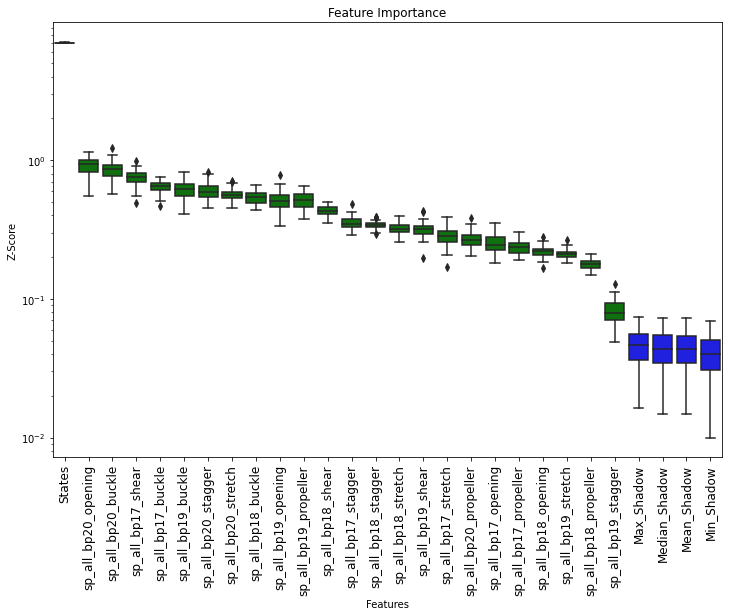

In [17]:
# Returns Boxplot of features
boruta_sp_dna.plot(X_size=12, figsize=(12,8),
            y_scale='log', which_features='accepted')

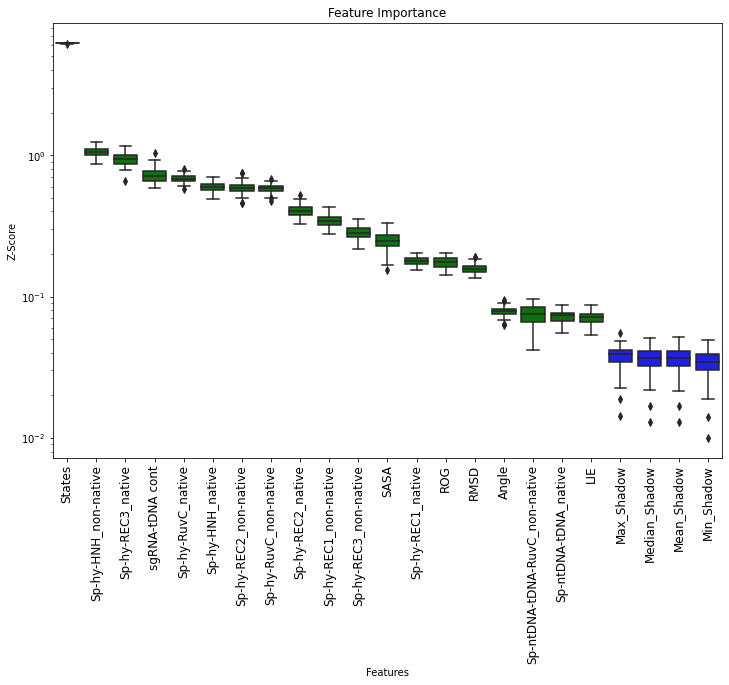

In [20]:
# Returns Boxplot of features
boruta_sp_prot.plot(X_size=12, figsize=(12,8),
            y_scale='log', which_features='accepted')

In [27]:
# Display features to be removed
dna_features_to_remove = boruta_sp_dna.features_to_remove
print(dna_features_to_remove)
# Removes them
X_train_sp_dna_shap = X_train.drop(columns = dna_features_to_remove)
X_test_sp_dna_shap = X_test.drop(columns = dna_features_to_remove)

[]


In [22]:
# Display features to be removed
prot_features_to_remove = boruta_sp_prot.features_to_remove
print(prot_features_to_remove)
# Removes them
X_train_sp_prot_shap = X_train.drop(columns = prot_features_to_remove)
X_test_sp_prot_shap = X_test.drop(columns = prot_features_to_remove)

[]


In [43]:
# Scale the top features data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_sp_dna_shap)
X_test_scaled = scaler.transform(X_test_sp_dna_shap)

# Initialize the models
rf_model = RandomForestClassifier()
gb_model = GradientBoostingClassifier()
ab_model = AdaBoostClassifier()
svm_model = SVC()
xgb_model = XGBClassifier()

# Define the parameter grids for each model
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

gb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 10]
}

ab_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.05, 0.01]
}

svm_params = {
    'C': [1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

xgb_params = {
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 10],
    'n_estimators': [100, 200, 300]
}

# Create a list of models and parameter grids
models = [rf_model, gb_model, ab_model, svm_model, xgb_model]
param_grids = [rf_params, gb_params, ab_params, svm_params, xgb_params]

# Create an empty dictionary to store best parameters
best_params_dict_sp_dna = {}

# Perform grid search with tqdm progress bar
for model, param_grid in tqdm(zip(models, param_grids), total=len(models), desc='Grid Search Progress'):
    grid = GridSearchCV(model, param_grid, cv=10, n_jobs=48)
    grid.fit(X_train_scaled, y_train)
    best_model = grid.best_estimator_
    best_params = grid.best_params_
    
    # Store the best parameters in the dictionary
    best_params_dict_sp_dna[model] = best_model
    
    # Print the best parameters and best score for the current model
    print(f"Best parameters for {model.__class__.__name__}: {best_params}")
    print(f"Best score for {model.__class__.__name__}: {grid.best_score_}")
    print()


Grid Search Progress:  20%|████████████████                                                                | 1/5 [08:10<32:41, 490.39s/it]

Best parameters for RandomForestClassifier: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 300}
Best score for RandomForestClassifier: 0.9827854579229592



Grid Search Progress:  40%|██████████████████████████████                                             | 2/5 [2:24:02<4:09:52, 4997.37s/it]

Best parameters for GradientBoostingClassifier: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 300}
Best score for GradientBoostingClassifier: 0.9840995231673318



Grid Search Progress:  60%|█████████████████████████████████████████████                              | 3/5 [2:25:28<1:31:49, 2754.89s/it]

Best parameters for AdaBoostClassifier: {'learning_rate': 0.01, 'n_estimators': 100}
Best score for AdaBoostClassifier: 0.8805055030778952



Grid Search Progress:  80%|█████████████████████████████████████████████████████████████▌               | 4/5 [2:34:40<31:25, 1885.18s/it]

Best parameters for SVC: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best score for SVC: 0.9837052954381138



Grid Search Progress: 100%|█████████████████████████████████████████████████████████████████████████████| 5/5 [2:55:27<00:00, 2105.53s/it]

Best parameters for XGBClassifier: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}
Best score for XGBClassifier: 0.9839900085349162



In [45]:
# Make predictions on the test set using the best models
rf_pred = best_params_dict_sp_dna[rf_model].predict(X_test_scaled)
gb_pred = best_params_dict_sp_dna[gb_model].predict(X_test_scaled)
ab_pred = best_params_dict_sp_dna[ab_model].predict(X_test_scaled)
svm_pred = best_params_dict_sp_dna[svm_model].predict(X_test_scaled)
xgb_pred = best_params_dict_sp_dna[xgb_model].predict(X_test_scaled)

# Calculate accuracy for each model
rf_accuracy = accuracy_score(y_test, rf_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)
ab_accuracy = accuracy_score(y_test, ab_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

# Calculate precision for each model
rf_precision = precision_score(y_test, rf_pred, average='weighted')
gb_precision = precision_score(y_test, gb_pred, average='weighted')
ab_precision = precision_score(y_test, ab_pred, average='weighted')
svm_precision = precision_score(y_test, svm_pred, average='weighted')
xgb_precision = precision_score(y_test, xgb_pred, average='weighted')

# Calculate recall for each model
rf_recall = recall_score(y_test, rf_pred, average='weighted')
gb_recall = recall_score(y_test, gb_pred, average='weighted')
ab_recall = recall_score(y_test, ab_pred, average='weighted')
svm_recall = recall_score(y_test, svm_pred, average='weighted')
xgb_recall = recall_score(y_test, xgb_pred, average='weighted')

# Calculate F1-score for each model
rf_f1 = f1_score(y_test, rf_pred, average='weighted')
gb_f1 = f1_score(y_test, gb_pred, average='weighted')
ab_f1 = f1_score(y_test, ab_pred, average='weighted')
svm_f1 = f1_score(y_test, svm_pred, average='weighted')
xgb_f1 = f1_score(y_test, xgb_pred, average='weighted')

# Print the precision scores
print("Random Forest Precision:", rf_precision)
print("Gradient Boosting Precision:", gb_precision)
print("AdaBoost Precision:", ab_precision)
print("Support Vector Machine Precision:", svm_precision)
print("XGBoost Precision:", xgb_precision)

# Print the recall scores
print("Random Forest recall:", rf_recall)
print("Gradient Boosting recall:", gb_recall)
print("AdaBoost recall:", ab_recall)
print("Support Vector Machine recall:", svm_recall)
print("XGBoost recall:", xgb_recall)

# Print the F1-scores
print("Random Forest F1-score:", rf_f1)
print("Gradient Boosting F1-score:", gb_f1)
print("AdaBoost F1-score:", ab_f1)
print("Support Vector Machine F1-score:", svm_f1)
print("XGBoost F1-score:", xgb_f1)

# Print the accuracies
print("Random Forest Accuracy:", rf_accuracy)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("AdaBoost Accuracy:", ab_accuracy)
print("Support Vector Machine Accuracy:", svm_accuracy)
print("XGBoost Accuracy:", xgb_accuracy)


grid_bor_sp_dna_accuracy=[rf_accuracy,gb_accuracy,ab_accuracy,svm_accuracy,xgb_accuracy]
grid_bor_sp_dna_precision=[rf_precision,gb_precision,ab_precision,svm_precision,xgb_precision]
grid_bor_sp_dna_recall=[rf_recall,gb_recall,ab_recall,svm_recall,xgb_recall]
grid_bor_sp_dna_f1=[rf_f1,gb_f1,ab_f1,svm_f1,xgb_f1]
models=['Random Forest','Gradient Boosting','ADA Boosting','Support-vector Machine','XG-Boost']
bor_sp_dna=pd.DataFrame(list(zip(models,grid_bor_sp_dna_accuracy,grid_bor_sp_dna_precision,grid_bor_sp_dna_recall, grid_bor_sp_dna_f1)), 
                 columns=['Models','Accuracy','Precision','Recall','F1-score'])
bor_sp_dna.head()

Random Forest Precision: 0.9838827735687563
Gradient Boosting Precision: 0.9855554549971581
AdaBoost Precision: 0.8745457569670194
Support Vector Machine Precision: 0.9831516948074956
XGBoost Precision: 0.9847068566971233
Random Forest recall: 0.9837932544897066
Gradient Boosting recall: 0.9853701270258431
AdaBoost recall: 0.8729741568112133
Support Vector Machine recall: 0.9831800262812089
XGBoost recall: 0.9846692947875603
Random Forest F1-score: 0.9837945591796899
Gradient Boosting F1-score: 0.9854446413544512
AdaBoost F1-score: 0.8643060653710872
Support Vector Machine F1-score: 0.9831605476879074
XGBoost F1-score: 0.9846586602229379
Random Forest Accuracy: 0.9837932544897066
Gradient Boosting Accuracy: 0.9853701270258431
AdaBoost Accuracy: 0.8729741568112133
Support Vector Machine Accuracy: 0.9831800262812089
XGBoost Accuracy: 0.9846692947875603


,Models,Accuracy,Precision,Recall,F1-score
0,Random Forest,0.983793,0.983883,0.983793,0.983795
1,Gradient Boosting,0.985370,0.985555,0.985370,0.985445
2,ADA Boosting,0.872974,0.874546,0.872974,0.864306
3,Support-vector Machine,0.983180,0.983152,0.983180,0.983161
4,XG-Boost,0.984669,0.984707,0.984669,0.984659


In [46]:
# Assuming y_test, rf_pred, gb_pred, ab_pred, svm_pred, and xgb_pred are available

# Create a DataFrame with true labels and predictions
sp_dna = pd.DataFrame({'True Label': y_test,
                               'Random Forest': rf_pred,
                               'Gradient Boosting': gb_pred,
                               'AdaBoost': ab_pred,
                               'SVM': svm_pred,
                               'XGBoost': xgb_pred})

# Display the DataFrame
sp_dna.to_csv('spcas9_boruta_dna.csv', index=False)

In [9]:
df_dna_rfe = pd.read_csv('spcas9_boruta_dna.csv')
metric_master_df_eval = get_test_metrics(df_dna_rfe, df_dna_rfe.columns[1:].to_list())
metric_master_df_eval.to_csv('boruta_bootstrap_dna.csv', index=False)
for model in metric_master_df_eval.columns.to_list():
    
    print("\n", model)

    bootstrap_mean = statistics.mean(metric_master_df_eval[model])
    print('Mean', bootstrap_mean)

    alpha = 0.95
    z = 1.96

    margin_of_error = z * (np.std(metric_master_df_eval[model])/np.sqrt(df_dna_rfe.shape[0]))
    u = bootstrap_mean + margin_of_error
    l = bootstrap_mean - margin_of_error
    print('95 percent confidence interval Margin of error = %.3f' % (margin_of_error))
    print('\n--------------------------------------------')


 Random Forest-Accuracy
Mean 0.9838388085851949
95 percent confidence interval Margin of error = 0.000

--------------------------------------------

 Random Forest-Precision
Mean 0.9839250450378867
95 percent confidence interval Margin of error = 0.000

--------------------------------------------

 Random Forest-Recall
Mean 0.9838388085851949
95 percent confidence interval Margin of error = 0.000

--------------------------------------------

 Random Forest-F1 score
Mean 0.9838387862605327
95 percent confidence interval Margin of error = 0.000

--------------------------------------------

 Gradient Boosting-Accuracy
Mean 0.985395532194481
95 percent confidence interval Margin of error = 0.000

--------------------------------------------

 Gradient Boosting-Precision
Mean 0.9855744746068229
95 percent confidence interval Margin of error = 0.000

--------------------------------------------

 Gradient Boosting-Recall
Mean 0.985395532194481
95 percent confidence interval Margin of er

In [ ]:
# Scale the top features data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_sp_prot_shap)
X_test_scaled = scaler.transform(X_test_sp_prot_shap)

# Initialize the models
rf_model = RandomForestClassifier()
gb_model = GradientBoostingClassifier()
ab_model = AdaBoostClassifier()
svm_model = SVC()
xgb_model = XGBClassifier()

# Define the parameter grids for each model
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

gb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 10]
}

ab_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.05, 0.01]
}

svm_params = {
    'C': [1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

xgb_params = {
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 10],
    'n_estimators': [100, 200, 300]
}

# Create a list of models and parameter grids
models = [rf_model, gb_model, ab_model, svm_model, xgb_model]
param_grids = [rf_params, gb_params, ab_params, svm_params, xgb_params]

# Create an empty dictionary to store best parameters
best_params_dict_sp_prot = {}

# Perform grid search with tqdm progress bar
for model, param_grid in tqdm(zip(models, param_grids), total=len(models), desc='Grid Search Progress'):
    grid = GridSearchCV(model, param_grid, cv=10, n_jobs=48)
    grid.fit(X_train_scaled, y_train)
    best_model = grid.best_estimator_
    best_params = grid.best_params_
    
    # Store the best parameters in the dictionary
    best_params_dict_sp_prot[model] = best_model
    
    # Print the best parameters and best score for the current model
    print(f"Best parameters for {model.__class__.__name__}: {best_params}")
    print(f"Best score for {model.__class__.__name__}: {grid.best_score_}")
    print()


Grid Search Progress:  20%|███████████████▍                                                             | 1/5 [03:30<14:01, 210.35s/it]

Best parameters for RandomForestClassifier: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Best score for RandomForestClassifier: 0.9829606659825301



In [ ]:
# Make predictions on the test set using the best models
rf_pred = best_params_dict_sp_prot[rf_model].predict(X_test_scaled)
gb_pred = best_params_dict_sp_prot[gb_model].predict(X_test_scaled)
ab_pred = best_params_dict_sp_prot[ab_model].predict(X_test_scaled)
svm_pred = best_params_dict_sp_prot[svm_model].predict(X_test_scaled)
xgb_pred = best_params_dict_sp_prot[xgb_model].predict(X_test_scaled)

# Calculate accuracy for each model
rf_accuracy = accuracy_score(y_test, rf_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)
ab_accuracy = accuracy_score(y_test, ab_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

# Calculate precision for each model
rf_precision = precision_score(y_test, rf_pred, average='weighted')
gb_precision = precision_score(y_test, gb_pred, average='weighted')
ab_precision = precision_score(y_test, ab_pred, average='weighted')
svm_precision = precision_score(y_test, svm_pred, average='weighted')
xgb_precision = precision_score(y_test, xgb_pred, average='weighted')

# Calculate recall for each model
rf_recall = recall_score(y_test, rf_pred, average='weighted')
gb_recall = recall_score(y_test, gb_pred, average='weighted')
ab_recall = recall_score(y_test, ab_pred, average='weighted')
svm_recall = recall_score(y_test, svm_pred, average='weighted')
xgb_recall = recall_score(y_test, xgb_pred, average='weighted')

# Calculate F1-score for each model
rf_f1 = f1_score(y_test, rf_pred, average='weighted')
gb_f1 = f1_score(y_test, gb_pred, average='weighted')
ab_f1 = f1_score(y_test, ab_pred, average='weighted')
svm_f1 = f1_score(y_test, svm_pred, average='weighted')
xgb_f1 = f1_score(y_test, xgb_pred, average='weighted')

# Print the precision scores
print("Random Forest Precision:", rf_precision)
print("Gradient Boosting Precision:", gb_precision)
print("AdaBoost Precision:", ab_precision)
print("Support Vector Machine Precision:", svm_precision)
print("XGBoost Precision:", xgb_precision)

# Print the recall scores
print("Random Forest recall:", rf_recall)
print("Gradient Boosting recall:", gb_recall)
print("AdaBoost recall:", ab_recall)
print("Support Vector Machine recall:", svm_recall)
print("XGBoost recall:", xgb_recall)

# Print the F1-scores
print("Random Forest F1-score:", rf_f1)
print("Gradient Boosting F1-score:", gb_f1)
print("AdaBoost F1-score:", ab_f1)
print("Support Vector Machine F1-score:", svm_f1)
print("XGBoost F1-score:", xgb_f1)

# Print the accuracies
print("Random Forest Accuracy:", rf_accuracy)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("AdaBoost Accuracy:", ab_accuracy)
print("Support Vector Machine Accuracy:", svm_accuracy)
print("XGBoost Accuracy:", xgb_accuracy)


grid_bor_sp_prot_accuracy=[rf_accuracy,gb_accuracy,ab_accuracy,svm_accuracy,xgb_accuracy]
grid_bor_sp_prot_precision=[rf_precision,gb_precision,ab_precision,svm_precision,xgb_precision]
grid_bor_sp_prot_recall=[rf_recall,gb_recall,ab_recall,svm_recall,xgb_recall]
grid_bor_sp_prot_f1=[rf_f1,gb_f1,ab_f1,svm_f1,xgb_f1]
models=['Random Forest','Gradient Boosting','ADA Boosting','Support-vector Machine','XG-Boost']
bor_sp_prot=pd.DataFrame(list(zip(models,grid_bor_sp_prot_accuracy,grid_bor_sp_prot_precision,grid_bor_sp_prot_recall, grid_bor_sp_prot_f1)), 
                 columns=['Models','Accuracy','Precision','Recall','F1-score'])
bor_sp_prot.head()

In [ ]:
# Assuming y_test, rf_pred, gb_pred, ab_pred, svm_pred, and xgb_pred are available

# Create a DataFrame with true labels and predictions
sp_prot = pd.DataFrame({'True Label': y_test,
                               'Random Forest': rf_pred,
                               'Gradient Boosting': gb_pred,
                               'AdaBoost': ab_pred,
                               'SVM': svm_pred,
                               'XGBoost': xgb_pred})

# Display the DataFrame
sp_prot.to_csv('spcas9_boruta_prot.csv', index=False)

In [ ]:
df_prot_rfe = pd.read_csv('spcas9_boruta_prot.csv')
metric_master_df_eval = get_test_metrics(df_prot_rfe, df_prot_rfe.columns[1:].to_list())
metric_master_df_eval.to_csv('boruta_bootstrap_prot.csv', index=False)
for model in metric_master_df_eval.columns.to_list():
    
    print("\n", model)

    bootstrap_mean = statistics.mean(metric_master_df_eval[model])
    print('Mean', bootstrap_mean)

    alpha = 0.95
    z = 1.96

    margin_of_error = z * (np.std(metric_master_df_eval[model])/np.sqrt(df_prot_rfe.shape[0]))
    u = bootstrap_mean + margin_of_error
    l = bootstrap_mean - margin_of_error
    print('95 percent confidence interval Margin of error = %.3f' % (margin_of_error))
    print('\n--------------------------------------------')